<a href="https://colab.research.google.com/github/adrinorosario/stellar-and-galactic-object-classification/blob/main/SDSS_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SDSS Dataset Exploratory Data Ananlysis

Now, we will proceed with performing some Exploratory Data Analysis on the SDSS dataset obtained from the **[SDSS SkyServer DR18](https://skyserver.sdss.org/dr18/)** using the CASJobs web interface which can be found [here](https://skyserver.sdss.org/CasJobs/SubmitJob.aspx).

Documentation links:
* [Simple Guide - CASJobs](https://casjobs.sdss.org/casjobs/Guide.aspx)
* [About the SDSS SkyServer Database](https://skyserver.sdss.org/dr14/en/help/docs/intro.aspx#top)
* [SkyServer Database Schema Browser](https://skyserver.sdss.org/dr14/en/help/docs/intro.aspx#top)
* [SQL Cookbook for SDSS (DR18)](https://www.sdss.org/dr18/tutorials/)

Now, moving on to our goal of this notebook - **to perform some EDA and statistical testing on our data.**

## 1. Environment setup and data loading

We will load all the necessary packages required for performing exploratory data analysis. These include `pandas, nump, seaborn and matplotlib.pyplot`.

For statistical testing, we will use the `scipy.stats` library to leverage its prebuilt functions for statistical analyses.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [4]:
# read in the CSV files
star_5000 = pd.read_csv("/content/Star5000Sample_adrino_0.csv")
galaxy_5000 = pd.read_csv("/content/Galaxy5000Sample_adrino_0.csv")
qso_5000 = pd.read_csv("/content/QSO5000Sample_adrino_0.csv")

In [ ]:
star_5000.head(5)

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,type,class,subclass
0,1237659324957262195,21.60069,20.05125,19.41596,19.14403,19.13663,-0.000411,21.60731,20.02878,19.42174,...,21.60069,20.05125,19.41596,19.14403,19.13663,249.389880,36.138041,6,STAR,G8V (101501)
1,1237659329779990930,21.93001,21.91750,21.52963,21.27470,22.06409,-0.001336,21.70408,22.09389,21.74253,...,21.93001,21.91750,21.52963,21.27470,22.06409,249.260969,36.317375,6,STAR,A5Ia (17378)
2,1237665356156895340,24.35331,25.94455,21.84285,22.26830,23.32642,0.000009,24.27700,25.87515,21.91229,...,24.35331,25.94455,21.84285,22.26830,23.32642,244.688463,35.306784,6,STAR,F0II (25291)
3,1237665356157026743,21.78707,21.03528,20.75958,20.59272,20.57331,-0.001028,21.75583,21.02914,20.75499,...,21.78707,21.03528,20.75958,20.59272,20.57331,244.759436,35.642287,6,STAR,F2V (33256)
4,1237672795570307316,22.29189,21.39089,20.95556,20.78251,20.52724,-0.000739,22.26347,21.41386,20.99293,...,22.29189,21.39089,20.95556,20.78251,20.52724,1.795521,-5.193646,6,STAR,F6V (16673)


In [ ]:
galaxy_5000.head(5)

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,type,class,subclass
0,1237648720679076369,23.10595,20.66453,18.96979,18.31188,17.78633,0.369197,25.14164,22.25788,20.56831,...,23.10595,20.66453,18.96979,18.31188,17.78633,146.192460,-0.508262,3,GALAXY,NaN
1,1237648721215881342,18.53085,16.56960,15.63575,15.19359,14.81316,0.036730,20.00671,18.09088,17.16710,...,18.53085,16.56960,15.63575,15.19359,14.81316,146.057304,-0.097030,3,GALAXY,NaN
2,1237661382236307764,24.34366,22.12065,20.57187,19.56820,18.98692,0.529718,24.23231,22.80094,21.26803,...,24.34366,22.12065,20.57187,19.56820,18.98692,148.055494,35.329555,3,GALAXY,NaN
3,1237661382773440711,19.70524,17.89358,16.71870,16.25648,15.86245,0.185496,22.13639,20.08626,18.83648,...,19.70524,17.89358,16.71870,16.25648,15.86245,148.459515,35.992702,3,GALAXY,NaN
4,1237662238021386587,19.25096,18.01749,17.47042,17.12019,16.88719,0.080418,21.38761,20.19293,19.79363,...,19.25096,18.01749,17.47042,17.12019,16.88719,226.819937,7.816179,3,GALAXY,STARFORMING


In [ ]:
qso_5000.head(5)

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,type,class,subclass
0,1237648720672456843,19.09794,18.86200,18.62111,18.63129,18.50032,1.021404,19.09332,18.86416,18.61784,...,19.09794,18.86200,18.62111,18.63129,18.50032,131.084438,-0.452056,6,QSO,BROADLINE
1,1237648721209262485,19.37514,19.10271,19.04302,18.82779,18.83307,1.630802,19.35772,19.11467,19.05867,...,19.37514,19.10271,19.04302,18.82779,18.83307,131.003111,-0.160728,6,QSO,BROADLINE
2,1237648721209328431,23.17341,21.88116,21.17561,21.05995,20.49997,2.451194,23.16090,21.97578,21.27882,...,23.17341,21.88116,21.17561,21.05995,20.49997,131.074253,-0.064993,3,QSO,NaN
3,1237648721209393741,20.63601,20.63088,20.45119,20.61853,20.40845,0.974395,20.66001,20.64027,20.48331,...,20.63601,20.63088,20.45119,20.61853,20.40845,131.226257,-0.040683,6,QSO,NaN
4,1237648721746068071,21.49543,21.40450,21.24363,20.96151,21.05701,1.737630,21.49860,21.43789,21.26963,...,21.49543,21.40450,21.24363,20.96151,21.05701,130.882323,0.235083,6,QSO,NaN


## 2. Explore the datasets

Goals of this section:

1. Explore the 3 datasets and understand their composition and structure
2. Compute descriptive statistics and get a macro level understanding of all 3 datasets
3. What are the columns present in all 3 datasets? Are they consistent through all the 3 (stars, galaxies and quasars)?
4. Check for rows and columns with missing values.
5. Understand the nature of the missing values and decide the best method to deal with them (drop or replace?).

In [ ]:
star_5000.isna().sum()

,0
objID,0
u,0
g,0
r,0
i,0
z,0
redshift,0
psfMag_u,0
psfMag_g,0
psfMag_r,0


In [ ]:
galaxy_5000.isna().sum()

,0
objID,0
u,0
g,0
r,0
i,0
z,0
redshift,0
psfMag_u,0
psfMag_g,0
psfMag_r,0


In [ ]:
qso_5000.isna().sum()

,0
objID,0
u,0
g,0
r,0
i,0
z,0
redshift,0
psfMag_u,0
psfMag_g,0
psfMag_r,0


In [ ]:
na_subclass_count = int(qso_5000["subclass"].isna().sum() + galaxy_5000["subclass"].isna().sum())

In [ ]:
(na_subclass_count / (qso_5000.shape[0] + star_5000.shape[0] + galaxy_5000.shape[0])) * 100

38.2

From the above results, we can see that the `star_5000` dataframe does not have any missing values. However, the `galaxy_5000` and `qso_5000` have a lot of missing values, only in the *`subclass`* column. Since the proportion of missing values for `subclass` column is about 1/3 of our entire dataframe size, we will drop said column.

In [8]:
star_5000 = star_5000.drop(["subclass"], axis=1)
qso_5000 = qso_5000.drop(["subclass"], axis=1)
galaxy_5000 = galaxy_5000.drop(["subclass"], axis=1)

"subclass" in star_5000.columns and "subclass" in qso_5000.columns and "subclass" in galaxy_5000.columns

False

In [ ]:
star_5000.describe()

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,type
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.237664e+18,20.983105,19.443456,18.763757,18.427835,18.267714,-0.000100,20.952586,19.471200,18.802698,18.462497,18.294069,20.983105,19.443456,18.763757,18.427835,18.267714,146.490668,23.358322,5.886600
std,7.504454e+12,2.214065,1.958088,1.796719,1.723584,1.759513,0.000429,2.167090,1.977960,1.825118,1.744392,1.768245,2.214065,1.958088,1.796719,1.723584,1.759513,92.615812,20.685816,0.572194
min,1.237646e+18,15.088220,14.589220,14.040450,13.843110,13.314760,-0.004136,15.090980,14.593500,14.035680,13.845560,13.732100,15.088220,14.589220,14.040450,13.843110,13.314760,0.118896,-11.241591,3.000000
25%,1.237659e+18,19.358235,18.021577,17.388787,17.127792,16.960275,-0.000274,19.364145,18.030213,17.412485,17.139250,16.976103,19.358235,18.021577,17.388787,17.127792,16.960275,50.355142,4.364063,6.000000
50%,1.237662e+18,20.544855,19.176335,18.686100,18.434175,18.209865,-0.000062,20.553370,19.189630,18.704805,18.448795,18.222985,20.544855,19.176335,18.686100,18.434175,18.209865,140.173407,23.553033,6.000000
75%,1.237668e+18,22.643088,21.110895,20.333603,19.791942,19.491727,0.000091,22.603495,21.135948,20.388668,19.933872,19.566715,22.643088,21.110895,20.333603,19.791942,19.491727,216.124027,41.315350,6.000000
max,1.237681e+18,27.325760,26.788130,21.999810,24.612700,24.437550,0.004037,27.119100,25.875150,23.546310,24.364470,23.261120,27.325760,26.788130,21.999810,24.612700,24.437550,359.780950,59.478925,6.000000


In [ ]:
galaxy_5000.describe()

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,type
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.237664e+18,22.192955,20.458296,19.171728,18.491020,18.101367,0.367183,22.891221,21.527354,20.331401,19.669112,19.224460,22.192955,20.458296,19.171728,18.491020,18.101367,171.864315,17.963310,3.128400
std,7.274865e+12,2.365624,2.177941,1.863473,1.671610,1.622577,0.258732,1.614162,1.721076,1.467598,1.270852,1.217219,2.365624,2.177941,1.863473,1.671610,1.622577,61.063763,14.172616,0.607279
min,1.237649e+18,15.028880,14.822180,14.052380,13.483800,12.997580,-0.007743,17.516060,16.662970,15.953890,15.667650,15.311360,15.028880,14.822180,14.052380,13.483800,12.997580,1.256416,-9.019794,3.000000
25%,1.237658e+18,20.097198,18.382950,17.506952,17.078337,16.773202,0.119240,21.493805,19.911095,19.060723,18.623323,18.274040,20.097198,18.382950,17.506952,17.078337,16.773202,135.076628,6.021979,3.000000
50%,1.237664e+18,22.476855,21.092510,19.460895,18.749205,18.315630,0.351041,23.126565,21.928105,20.510185,19.876180,19.442615,22.476855,21.092510,19.460895,18.749205,18.315630,160.050522,14.016315,3.000000
75%,1.237668e+18,23.978775,22.217845,20.757790,19.782540,19.318160,0.555155,24.137590,22.915945,21.566715,20.608170,20.087025,23.978775,22.217845,20.757790,19.782540,19.318160,219.558114,29.824520,3.000000
max,1.237681e+18,27.679830,26.121010,21.999770,23.998550,24.080750,1.951209,26.816220,25.929910,23.582110,24.291330,23.727740,27.679830,26.121010,21.999770,23.998550,24.080750,359.678397,53.857765,6.000000


In [ ]:
qso_5000.describe()

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra,dec,type
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.237664e+18,21.438928,20.929627,20.628227,20.438150,20.297422,1.638804,21.439389,20.993848,20.708841,20.517853,20.360737,21.438928,20.929627,20.628227,20.438150,20.297422,178.082404,25.564012,5.793000
std,9.340167e+12,1.331747,1.067077,0.988035,0.987484,1.021699,0.820895,1.287975,1.088249,0.993574,0.965338,0.969720,1.331747,1.067077,0.988035,0.987484,1.021699,91.883695,17.340344,0.760438
min,1.237649e+18,16.612720,15.144840,14.292350,14.077170,13.823710,0.019425,16.754500,16.650840,16.496990,16.273750,15.999910,16.612720,15.144840,14.292350,14.077170,13.823710,0.299074,-10.997950,3.000000
25%,1.237657e+18,20.664568,20.335010,20.081375,19.898875,19.717265,1.110972,20.676022,20.364300,20.128900,19.966213,19.800277,20.664568,20.335010,20.081375,19.898875,19.717265,130.576201,5.563070,6.000000
50%,1.237664e+18,21.450820,21.097030,20.828560,20.597815,20.408360,1.548765,21.453700,21.140175,20.869055,20.671935,20.460780,21.450820,21.097030,20.828560,20.597815,20.408360,150.773271,30.013170,6.000000
75%,1.237669e+18,22.106357,21.657035,21.383735,21.159903,21.008187,2.047457,22.093388,21.708172,21.453340,21.235105,21.055185,22.106357,21.657035,21.383735,21.159903,21.008187,249.682886,39.206891,6.000000
max,1.237681e+18,27.434460,26.793170,21.999090,24.450260,23.850270,7.011245,26.109630,26.058680,23.694450,24.327310,23.768770,27.434460,26.793170,21.999090,24.450260,23.850270,359.809734,65.163409,6.000000


Now, we need to compute the colour indices. These are important parameters that help us in determining the **colour** of celestial bodies and in our case, will help us in classifying between the 3 bodies.

The important colour indicies we require are :
* $u-g$
* $g-r$
* $r-i$
* $i-z$

For calculating the colour indicies of stars, we will use the `psfMag` or `Point Spread Function Magnitudes` columns. For galaxies and quasars, we will use the `modelMag` or `Model Magnitudes`. The reason for choosing these columns distinctly is explained below.

$\to$ **Choosing Point Spread Function Magnitudes (`psfMag`) for Stars and Model Magnitudes (`modelMag`) for Galaxies and Quasars**

* The *Point Spread Function Magnitude (`psfMag`)* is an effective measurement for calucaulting the colour indices of stars and quasars mainly due to its apparent nature of being recorded by fitting a PSF model to the light distribtuion of the object.

  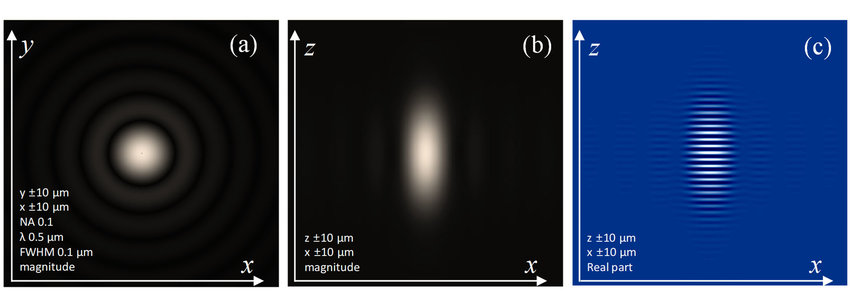
  
  [Image uploaded by Peter J. DE Groot](https://www.researchgate.net/figure/a-Magnitude-of-the-2D-PSF-in-the-x-y-plane-b-An-x-z-cross-section-of-the_fig3_335677224)

  The `psfMag` measures the true apprearance of the point after it is blurred by the telescope optics and the atmosphere. Stars are effectively point sources observed by the SDSS at a distance. Quasars are on the other-hand, are also more point-like yet unresolved in some imaging.

* In the case of galaxies, the *Model Mangitude (`modelMag`)* is obtained by fitting the light distribution of the spiral galaxies disks or elliptical galaxies to the object's light. The fitting is done primarily in the r-band and the result is taken to measure the magnitude in all other bands. This is recommended and better suited for galaxies because it helps in better studying the colours by providing a consistent aperture across all the bands. For quasars,



In [7]:
star_5000["u_g"] = star_5000["psfMag_u"] - star_5000["psfMag_g"]
star_5000["g_r"] = star_5000["psfMag_g"] - star_5000["psfMag_r"]
star_5000["r_i"] = star_5000["psfMag_r"] - star_5000["psfMag_i"]
star_5000["i_z"] = star_5000["psfMag_i"] - star_5000["psfMag_z"]

In [6]:
galaxy_5000["u_g"] = galaxy_5000["modelMag_u"] - galaxy_5000["modelMag_g"]
galaxy_5000["g_r"] = galaxy_5000["modelMag_g"] - galaxy_5000["modelMag_r"]
galaxy_5000["r_i"] = galaxy_5000["modelMag_r"] - galaxy_5000["modelMag_i"]
galaxy_5000["i_z"] = galaxy_5000["modelMag_i"] - galaxy_5000["modelMag_z"]

In [5]:
qso_5000["u_g"] = qso_5000["psfMag_u"] - qso_5000["psfMag_g"]
qso_5000["g_r"] = qso_5000["psfMag_g"] - qso_5000["psfMag_r"]
qso_5000["r_i"] = qso_5000["psfMag_r"] - qso_5000["psfMag_i"]
qso_5000["i_z"] = qso_5000["psfMag_i"] - qso_5000["psfMag_z"]

In [ ]:
star_5000.head(3)

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_i,modelMag_z,ra,dec,type,class,u_g,g_r,r_i,i_z
0,1237659324957262195,21.60069,20.05125,19.41596,19.14403,19.13663,-0.000411,21.60731,20.02878,19.42174,...,19.14403,19.13663,249.389880,36.138041,6,STAR,1.57853,0.60704,0.28251,0.00578
1,1237659329779990930,21.93001,21.91750,21.52963,21.27470,22.06409,-0.001336,21.70408,22.09389,21.74253,...,21.27470,22.06409,249.260969,36.317375,6,STAR,-0.38981,0.35136,0.30114,-0.66418
2,1237665356156895340,24.35331,25.94455,21.84285,22.26830,23.32642,0.000009,24.27700,25.87515,21.91229,...,22.26830,23.32642,244.688463,35.306784,6,STAR,-1.59815,3.96286,-0.46447,-0.88436


In [ ]:
qso_5000.head(3)

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_i,modelMag_z,ra,dec,type,class,u_g,g_r,r_i,i_z
0,1237648720672456843,19.09794,18.86200,18.62111,18.63129,18.50032,1.021404,19.09332,18.86416,18.61784,...,18.63129,18.50032,131.084438,-0.452056,6,QSO,0.23594,0.24089,-0.01018,0.13097
1,1237648721209262485,19.37514,19.10271,19.04302,18.82779,18.83307,1.630802,19.35772,19.11467,19.05867,...,18.82779,18.83307,131.003111,-0.160728,6,QSO,0.27243,0.05969,0.21523,-0.00528
2,1237648721209328431,23.17341,21.88116,21.17561,21.05995,20.49997,2.451194,23.16090,21.97578,21.27882,...,21.05995,20.49997,131.074253,-0.064993,3,QSO,1.29225,0.70555,0.11566,0.55998


In [ ]:
galaxy_5000.head(3)

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_i,modelMag_z,ra,dec,type,class,u_g,g_r,r_i,i_z
0,1237648720679076369,23.10595,20.66453,18.96979,18.31188,17.78633,0.369197,25.14164,22.25788,20.56831,...,18.31188,17.78633,146.192460,-0.508262,3,GALAXY,2.44142,1.69474,0.65791,0.52555
1,1237648721215881342,18.53085,16.56960,15.63575,15.19359,14.81316,0.036730,20.00671,18.09088,17.16710,...,15.19359,14.81316,146.057304,-0.097030,3,GALAXY,1.96125,0.93385,0.44216,0.38043
2,1237661382236307764,24.34366,22.12065,20.57187,19.56820,18.98692,0.529718,24.23231,22.80094,21.26803,...,19.56820,18.98692,148.055494,35.329555,3,GALAXY,2.22301,1.54878,1.00367,0.58128


## 3. Exploratory Data Analysis and Statistical Testing

The objectives of this section are as follows:

* Perform EDA on the dataset
* Understand the characteristics of the parameters important for classification
* Test out hypotheses and claims

First, we will combine all 3 datasets into one single dataset.

In [9]:
df = pd.concat([star_5000, galaxy_5000, qso_5000])
df

,objID,u,g,r,i,z,redshift,psfMag_u,psfMag_g,psfMag_r,...,modelMag_i,modelMag_z,ra,dec,type,class,u_g,g_r,r_i,i_z
0,1237659324957262195,21.60069,20.05125,19.41596,19.14403,19.13663,-0.000411,21.60731,20.02878,19.42174,...,19.14403,19.13663,249.389880,36.138041,6,STAR,1.57853,0.60704,0.28251,0.00578
1,1237659329779990930,21.93001,21.91750,21.52963,21.27470,22.06409,-0.001336,21.70408,22.09389,21.74253,...,21.27470,22.06409,249.260969,36.317375,6,STAR,-0.38981,0.35136,0.30114,-0.66418
2,1237665356156895340,24.35331,25.94455,21.84285,22.26830,23.32642,0.000009,24.27700,25.87515,21.91229,...,22.26830,23.32642,244.688463,35.306784,6,STAR,-1.59815,3.96286,-0.46447,-0.88436
3,1237665356157026743,21.78707,21.03528,20.75958,20.59272,20.57331,-0.001028,21.75583,21.02914,20.75499,...,20.59272,20.57331,244.759436,35.642287,6,STAR,0.72669,0.27415,0.17229,0.01086
4,1237672795570307316,22.29189,21.39089,20.95556,20.78251,20.52724,-0.000739,22.26347,21.41386,20.99293,...,20.78251,20.52724,1.795521,-5.193646,6,STAR,0.84961,0.42093,0.19129,0.31537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1237678824098038460,21.20652,21.06583,20.78998,20.76210,20.30957,1.449921,21.19287,21.06549,20.77686,...,20.76210,20.30957,326.640907,3.110061,6,QSO,0.12738,0.28863,-0.02096,0.47329
4996,1237678824098103662,20.34307,20.16098,20.00920,19.76901,19.71872,1.918691,20.31214,20.17169,20.01063,...,19.76901,19.71872,326.741748,3.249749,6,QSO,0.14045,0.16106,0.21978,0.07393
4997,1237678824098103837,21.22289,20.81043,20.55345,20.37359,20.01987,1.622797,21.22987,20.82619,20.54190,...,20.37359,20.01987,326.662817,3.251487,6,QSO,0.40368,0.28429,0.14113,0.37840
4998,1237678824098103847,20.64742,20.33724,20.02773,20.02608,19.99317,1.111624,20.59321,20.37671,20.07022,...,20.02608,19.99317,326.678107,3.181776,6,QSO,0.21650,0.30649,-0.02287,0.07142


In [10]:
df.to_csv("/content/drive/MyDrive/sdss_15k_sample.csv", index=False)

<Axes: xlabel='redshift', ylabel='class'>

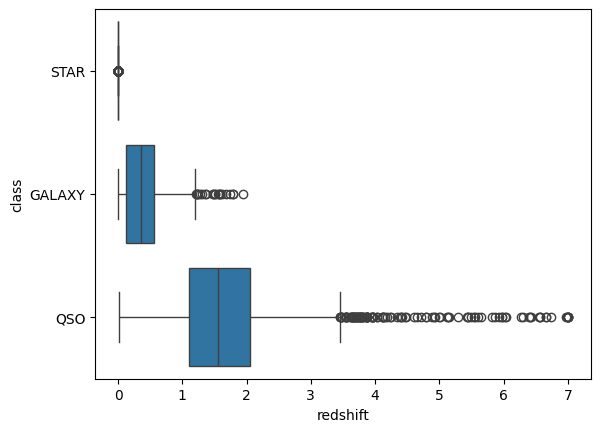

In [ ]:
sns.boxplot(data=df, x="redshift", y="class")

We can observe the following from the above boxplot:

* The `redshift` of stars does not seem to contain a significant number of outliers.
* In the case of galaxies, there do appear to be a significant number of outliers as indicated by the above boxplot.
* Quasars, have the most number of outliers for `redshift`; almost half of the `redshift` values appear to be outliers.

**Understanding `redshift` and its significance in astronomy**

Redshift is redfined as the spread of electromagnetic wavelenghts such as that of light when travelling through space.

The following points should help in understanding it better:

* When a body is moving away from us, the redshift is stretched and is wider due to the greater distance it needs to travel.
* When a body is moving towards us, the redshift is compressed and narrower due to the less distance it needs to travel.

Redshift is also used to measure the distance to cosmic bodies and looking back in time.

**Importance of `redshift` for our problem**

Redshift helps us in identifying and classifying whether the particular observed body is a star, galaxy or quasar. The observation of redshift for these 3 bodies is affected by the expansion of space and the distance of these bodies from us.

* The stars observed are typically located in our Milky Way galaxy and therefore are not that farther away as compared to other galaxies and quasars. Therefore, the `redshift` of stars is typically close to zero.

  * **Stars:** Colours are primarily determined by temperature. Redshift is low and almost 0 or negative ($z ≈ 0$).

* Galaxies, on the other hand are inter-gallactic bodies and thier distance from us also adheres to the same. Therefore, the light perceived of them is a collection of the light produced by all its stars along with some cosmic dust and gas. Their observed cosmological `redshift` is affected by the expansion of the universe. Therefore, their redshift is higher than that of stars.

  * **Galaxies:** Colours are determined by the collective light emitted by stars and cosmic dust and gas, which significantly alter its redshift. Have moderate redshifts.

* Quasars on the other hand are the most farthest in existence, in the center of the farthest galaxies. Though they appear sometimes to be as bright as local stars, their redshift is the highest of the 3 bodies owing to the sheer stellar distance it takes for thier light to reach us.

  * **Quasars:** Colour determined by non-thermal SED's and high redshifts ($z \geq 0.5$).

<Axes: xlabel='redshift', ylabel='Count'>

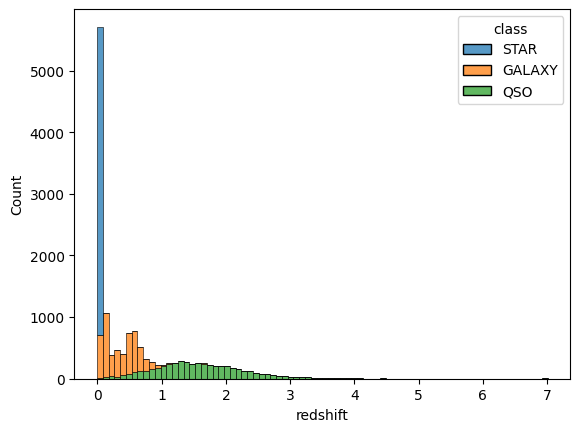

In [ ]:
sns.histplot(data=df, x="redshift", hue="class", multiple="stack")

We can see that the data for `redshift` in our dataset is heavily right skewed. Fruthermore, when distinguished using a grouped histogram, we can see that the concentration does not exceed beyond 0 for stars but is a bit more spread across for galaxies and quasars.

Galxies again seem to be a bit more right skewed while quasars have a normal distribution from this high level overview.

<Axes: xlabel='redshift', ylabel='Count'>

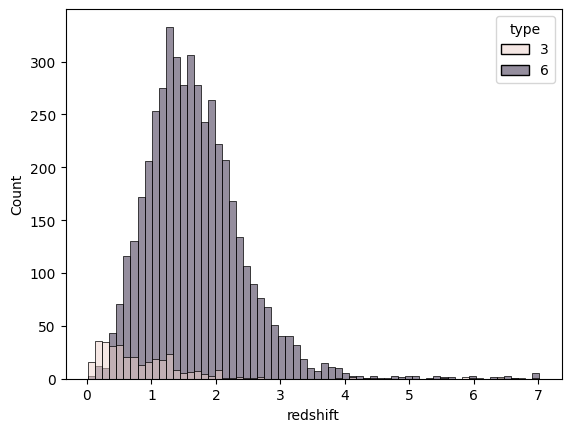

In [ ]:
sns.histplot(data=qso_5000, x="redshift", hue="type")

<Axes: xlabel='redshift', ylabel='Count'>

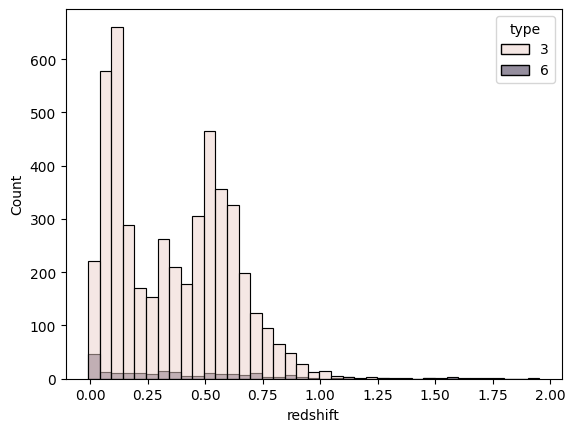

In [ ]:
sns.histplot(data=galaxy_5000, x="redshift", hue="type")

From the above visualizations, we can observe that the distribution of `redshift` for quasars is more right-skewed compared to that of galaxies.

$\to$ For quasars, the major concentration of `redshift` lies approximately between 0.5 and 3.0; in the case of galaxies, the major concentration is between 0.0 and 0.80, almost close to 1.0 but not very much.

The `redshift` of stars is pretty much 0. Confirming it with a histogram below, we can see the majority concentration lies between -0.001 and 0.001

<Axes: xlabel='redshift', ylabel='Count'>

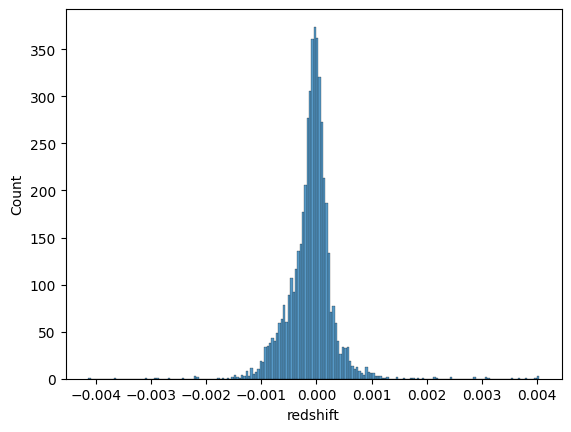

In [ ]:
sns.histplot(data=star_5000, x="redshift")

Using the below stripplot, we can clearly visualize the spread of redshift values among each classes and within their respective types.

<Axes: xlabel='class', ylabel='redshift'>

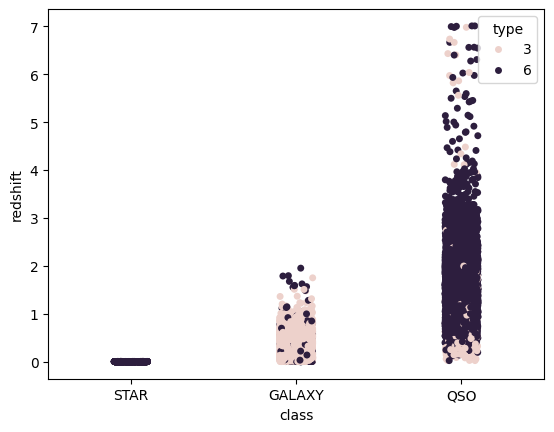

In [ ]:
sns.stripplot(data=df, x="class", y="redshift", hue="type")

### 3.1 Hypothesis Testing

As seen above, we can see that redshift of stars is clearly smaller comapared to those of galaxies and quasars, with quasars having the greatest redshift values.

Now, we will coduct a few hypothesis tests to see if that is statistically significant or true. To be precise, we will conduct hyposthesis tests to test the following claim:

$ star\ redshift < galaxy\ redshift < qso\ redshift $

In [ ]:
mean_star_redshift = star_5000["redshift"].mean()
mean_galaxy_redshift = galaxy_5000["redshift"].mean()
mean_qso_redshift = qso_5000["redshift"].mean()

print(f"Mean redshift in stars: {mean_star_redshift}")
print(f"Mean redshift in galaxies: {mean_galaxy_redshift}")
print(f"Mean redshift in quasars: {mean_qso_redshift}")

Mean redshift in stars: -0.00010005301443822801
Mean redshift in galaxies: 0.367182916163768
Mean redshift in quasars: 1.63880374901


In [ ]:
mean_star_redshift < mean_galaxy_redshift < mean_qso_redshift

np.True_

***Hypothesis Test 1***

*Hypothesis*: The mean observed `redshift` value for stars is significantly lesser than those observed for galaxies.

$H_0$: There is no significant difference between the observed `redshift` for stars as those observed for galaxies.

$H_1$: `redshift` observed for galaxies is significantly greater than those observed for stars.

In [ ]:
star_redshift = df.loc[df["class"]=="STAR", "redshift"]
galaxy_redshift = df.loc[df["class"]=="GALAXY", "redshift"]

The significance level is set to be $5\%$.

In [ ]:
# significance level is 5%
sig_level = 0.05

In [ ]:
p_val_stat = stats.ttest_ind(star_redshift, galaxy_redshift, equal_var=False)

p_val_stat[1] < sig_level, p_val_stat

(np.True_,
 TtestResult(statistic=np.float64(-100.377166658805), pvalue=np.float64(0.0), df=np.float64(4999.0275106062445)))

From the above hypothesis test, we can clearly see that our p-value is lesser than the significance level. Therfore, we can reject the null hypothesis in favour of the alternate hypothesis.

Therefore, there is a significant difference in the redshifts of stars compared to that of galaxies, with galaxies having higher mean redshift values than stars.

***Hypothesis Test 2***

*Hypothesis*: The mean observed `redshift` for quasars is higher than the mean observed `redshift` of galaxies.

$H_0$: The `redshift` of galaxies is almost equal or lesser than that of quasars.

$H_1$: The `redshift` observed for quasars is higher than that observed for galaxies.

In [ ]:
qso_redshift = df.loc[df["class"]=="QSO", "redshift"]

Significance level remains at $5\%$.

In [ ]:
p_val_stat = stats.ttest_ind(galaxy_redshift, qso_redshift, equal_var=False)

p_val_stat[1] < sig_level, p_val_stat

(np.True_,
 TtestResult(statistic=np.float64(-104.46935960045326), pvalue=np.float64(0.0), df=np.float64(5982.4981765602)))

From the above hypothesis test, we can clearly see that our p-value is lesser than the significance level. Therfore, we can reject the null hypothesis in favour of the alternate hypothesis.

Therefore, the `redshift` observed for quasars is higher than that observed for galaxies.

## 4. Splitting data into train and test splits

Now, we are going to spilt our data into training and testing splits so that they can be fed into the model in an appropriate format. We are going to use and apply different methods and techniques to get a good train and test split.

The objectives of this section:
* Identify the necessary parameters (columns) that are needed for training and testing
* Using different techniques and arrive at 3 different sets of train and test sets
* Save/cache the splits

In [17]:
pd.DataFrame(df.columns)

,0
0,objID
1,u
2,g
3,r
4,i
5,z
6,redshift
7,psfMag_u
8,psfMag_g
9,psfMag_r


We have 24 columns above but we really do not need all of them. For our problem we are going to stick to the following parameters:

* Photometric data : $u, g, r, i, z$
* Spectral data: $redshift$
* Colour indicies: $u\_g, g\_r, r\_i, i\_z$
* Labels: $class$ (`target`)

These are the most important features that are required and fundamental for our problem of predictive classification.

Hence, we will create a seperate dataframe that only holds these columsn while omitting the others.

In [19]:
final_df = df.filter(["u", "g", "r", "i", "z", "u_g", "g_r", "r_i", "i_z", "redshift", "class"])
final_df.shape

(15000, 11)

In [20]:
final_df.head(3)

,u,g,r,i,z,u_g,g_r,r_i,i_z,redshift,class
0,21.60069,20.05125,19.41596,19.14403,19.13663,1.57853,0.60704,0.28251,0.00578,-0.000411,STAR
1,21.93001,21.91750,21.52963,21.27470,22.06409,-0.38981,0.35136,0.30114,-0.66418,-0.001336,STAR
2,24.35331,25.94455,21.84285,22.26830,23.32642,-1.59815,3.96286,-0.46447,-0.88436,0.000009,STAR


In [23]:
final_df["class"].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [26]:
final_df.value_counts(["class"])

,count
class,
GALAXY,5000
QSO,5000
STAR,5000


Awesome! We now have our dataset which can be split into its training and testing splits.

### 4.1 Creating train and test splits

**Note:** The `class` first needs to be encoded as strings are not supported to be target (`y`) values. We will use one-hot encoding method to convert them into numerical format and then create our splits.

In [27]:
encoder = {
    "STAR": 0,
    "GALAXY": 1,
    "QSO": 2
}

final_df["class"] = final_df["class"].map(encoder)
final_df["class"].value_counts()

,count
class,
0,5000
1,5000
2,5000


In [30]:
X = final_df.drop(['class'], axis=1)
X.columns

Index(['u', 'g', 'r', 'i', 'z', 'u_g', 'g_r', 'r_i', 'i_z', 'redshift'], dtype='object')

In [31]:
y = final_df["class"]
y.value_counts()

,count
class,
0,5000
1,5000
2,5000


Sweet! Now we can create our splits.

The `class` column will be our `y` or **target variable**, often called the **label**. The rest of the columns will be our `X` **features** or **parameter variables** that our model will learn from.

We will create 3 sets of train and test splits of the following ratios:

* 80:20 (80% training and 20% testing) - popular and widely used; balances training with sufficient testing.

* 67:33 (67% training and 33% testing) - used when you have a large dataset and want to maximize model learning

* 90:10 (90% training and 10% testing) - more emphasis on training while still having a sufficient proportion for testing.

***Note:*** Each split ratio has its own pros and cons. It highly depends on the nature of the dataset you are dealing with.

In [28]:
from sklearn.model_selection import train_test_split

In [41]:
# 80:20 split
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training features set has {X_train_80.shape[0]} rows with {X_train_80.shape[1]} columns")
print(f"Training labels set has {y_train_80.shape[0]} rows\n")

print(f"Testing features set has {X_test_80.shape[0]} rows with {X_test_80.shape[1]} columns")
print(f"Testing labels set has {y_test_80.shape[0]} rows")

Training features set has 12000 rows with 10 columns
Training labels set has 12000 rows

Testing features set has 3000 rows with 10 columns
Testing labels set has 3000 rows


In [42]:
# 67:33 split
X_train_67, X_test_67, y_train_67, y_test_67 = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42
)
X_train_67.shape, y_train_67.shape

print(f"Training features set has {X_train_67.shape[0]} rows with {X_train_67.shape[1]} columns")
print(f"Training labels set has {y_train_67.shape[0]} rows\n")

print(f"Testing features set has {X_test_67.shape[0]} rows with {X_test_67.shape[1]} columns")
print(f"Testing labels set has {y_test_67.shape[0]} rows")

Training features set has 10050 rows with 10 columns
Training labels set has 10050 rows

Testing features set has 4950 rows with 10 columns
Testing labels set has 4950 rows


In [43]:
# 90:10 split
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

print(f"Training features set has {X_train_90.shape[0]} rows with {X_train_90.shape[1]} columns")
print(f"Training labels set has {y_train_90.shape[0]} rows\n")

print(f"Testing features set has {X_test_90.shape[0]} rows with {X_test_90.shape[1]} columns")
print(f"Testing labels set has {y_test_90.shape[0]} rows")

Training features set has 13500 rows with 10 columns
Training labels set has 13500 rows

Testing features set has 1500 rows with 10 columns
Testing labels set has 1500 rows


We will save our splits locally.

In [44]:
import joblib

In [45]:
joblib.dump([X_train_80, X_test_80, y_train_80, y_test_80], "/content/drive/MyDrive/sdss_5000_train_test_split_80.joblib")
joblib.dump([X_train_67, X_test_67, y_train_67, y_test_67], "/content/drive/MyDrive/sdss_5000_train_test_split_67.joblib")
joblib.dump([X_train_90, X_test_90, y_train_90, y_test_90], "/content/drive/MyDrive/sdss_5000_train_test_split_90.joblib")

['/content/drive/MyDrive/sdss_5000_train_test_split_90.joblib']